<a href="https://colab.research.google.com/github/ridwanrputra/Decision-Stream/blob/master/bri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
!ls

credit-downsampled.csv	Untitled.ipynb


In [ ]:
df = pd.read_csv("credit-downsampled.csv")

In [ ]:
df[["MonthlyIncome","NumberOfDependents"]]

,MonthlyIncome,NumberOfDependents
0,1666.0,0.0
1,4200.0,3.0
2,3070.0,2.0
3,NaN,0.0
4,NaN,0.0
...,...,...
20047,4041.0,0.0
20048,1548.0,0.0
20049,NaN,0.0
20050,1614.0,0.0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RevolvingUtilizationOfUnsecuredLines  20052 non-null  float64
 1   age                                   20052 non-null  int64  
 2   NumberOfTime30.59DaysPastDueNotWorse  20052 non-null  int64  
 3   DebtRatio                             20052 non-null  float64
 4   MonthlyIncome                         16380 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       20052 non-null  int64  
 6   NumberOfTimes90DaysLate               20052 non-null  int64  
 7   NumberRealEstateLoansOrLines          20052 non-null  int64  
 8   NumberOfTime60.89DaysPastDueNotWorse  20052 non-null  int64  
 9   NumberOfDependents                    19603 non-null  float64
 10  Class                                 20052 non-null  int64  
dtypes: float64(4), 

In [ ]:
import pandas as pd
import numpy as np

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps


In /home/specialthanks/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/specialthanks/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/specialthanks/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/specialthanks/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/specialthanks/.local/lib/python3.6/

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30.59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60.89DaysPastDueNotWorse,NumberOfDependents,Class
RevolvingUtilizationOfUnsecuredLines,1.000000,-0.015476,-0.003057,0.029059,-0.001177,-0.011454,-0.002494,0.008296,-0.002150,-0.000051,0.001183
age,-0.015476,1.000000,-0.085671,0.027887,0.065300,0.207315,-0.090174,0.102344,-0.084174,-0.177935,-0.238278
NumberOfTime30.59DaysPastDueNotWorse,-0.003057,-0.085671,1.000000,-0.010446,-0.027164,-0.120932,0.988550,-0.062873,0.992217,-0.024292,0.120902
DebtRatio,0.029059,0.027887,-0.010446,1.000000,-0.040021,0.053654,-0.013016,0.090579,-0.011825,-0.027823,-0.018252
MonthlyIncome,-0.001177,0.065300,-0.027164,-0.040021,1.000000,0.133733,-0.032564,0.173106,-0.029555,0.059460,-0.053739
NumberOfOpenCreditLinesAndLoans,-0.011454,0.207315,-0.120932,0.053654,0.133733,1.000000,-0.151845,0.471721,-0.136677,0.036271,-0.063032
NumberOfTimes90DaysLate,-0.002494,-0.090174,0.988550,-0.013016,-0.032564,-0.151845,1.000000,-0.080716,0.993458,-0.028275,0.112177
NumberRealEstateLoansOrLines,0.008296,0.102344,-0.062873,0.090579,0.173106,0.471721,-0.080716,1.000000,-0.072112,0.084003,-0.015253
NumberOfTime60.89DaysPastDueNotWorse,-0.002150,-0.084174,0.992217,-0.011825,-0.029555,-0.136677,0.993458,-0.072112,1.000000,-0.029489,0.097699
NumberOfDependents,-0.000051,-0.177935,-0.024292,-0.027823,0.059460,0.036271,-0.028275,0.084003,-0.029489,1.000000,0.084530


In [ ]:
Xtraindf = df[["age", "DebtRatio", "MonthlyIncome", "NumberOfOpenCreditLinesAndLoans","RevolvingUtilizationOfUnsecuredLines"]]

In [ ]:
Xtraindf

,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,RevolvingUtilizationOfUnsecuredLines
0,54,0.000000,1666.0,1,1.000000
1,40,0.510355,4200.0,8,0.497080
2,40,0.047542,3070.0,6,0.797681
3,61,244.000000,NaN,14,0.043304
4,49,4.000000,NaN,1,0.810945
...,...,...,...,...,...
20047,68,0.156606,4041.0,8,0.017758
20048,47,0.943189,1548.0,5,0.998143
20049,46,3165.000000,NaN,13,0.466800
20050,68,0.495975,1614.0,4,1.000000


In [ ]:
ytrain = df[["Class"]]

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(random_state=0)
clf.fit(Xtraindf, ytrain)

/home/specialthanks/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0)

In [ ]:
Xtraindf = Xtraindf.fillna(Xtraindf.mean())

In [ ]:
importance = clf.coef_
# summarize feature importance
importance[0]

array([-4.67207421e-03, -1.75043141e-05, -3.82674982e-06,  1.59478558e-02,
        6.02914667e-05])

In [ ]:

for i,v in enumerate(importance[0]):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance


Feature: 0, Score: -0.00467
Feature: 1, Score: -0.00002
Feature: 2, Score: -0.00000
Feature: 3, Score: 0.01595
Feature: 4, Score: 0.00006


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
ypred = clf.predict(Xtraindf)

In [ ]:
from sklearn.metrics import plot_confusion_matrix

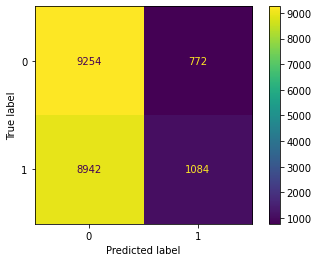

In [ ]:
plot_confusion_matrix(clf, Xtraindf, ytrain)